# Ex 1

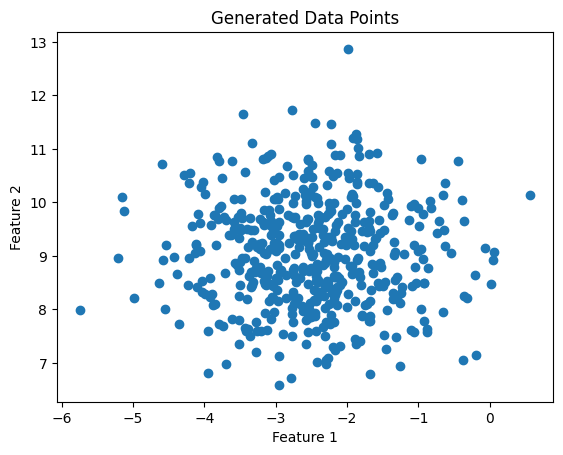

In [10]:
import sklearn
from sklearn import datasets

from LaboratorAD.Lab01 import X_train, y_train, X_test, y_test

# generate a 2D dataset that follows a standard normal distribution
# (500 points) using sklearn.datasets.make blobs.

data = datasets.make_blobs(n_samples=500, centers=1, cluster_std=1.0, random_state=42, center_box=(-10.0, 10.0))

X, y = data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [41]:
import numpy as np


mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity covariance matrix
vector = np.random.multivariate_normal(mean, cov, size=5)
# normalize the vectors to unit length
vector = vector / np.linalg.norm(vector, axis=1, keepdims=True)

def compute_anomaly_scores(X, projection_vectors, num_bins=10):
    scores = np.zeros(X.shape[0])
    for vec in projection_vectors:
        # Project the data onto the vector
        projected_values = X @ vec
        # Compute histogram
        # for the range parameter use a larger interval than the range of the projected values
        range = (projected_values.min() - 0.1, projected_values.max() + 0.1)
        hist, bin_edges = np.histogram(projected_values, bins=num_bins, range=range, density=True)
        # plotam histograma

        # plt.hist(projected_values, bins=num_bins, range=range, density=True, alpha=0.5)
        # plt.title("Histogram of Projected Values")
        # plt.xlabel("Projected Value")
        # plt.ylabel("Density")
        # plt.show()

        # Compute probabilities for each bin
        bin_indices = np.digitize(projected_values, bin_edges) - 1
        probabilities = hist[bin_indices]
        scores += probabilities

    # Average the scores over the number of projection vectors
    scores /= len(projection_vectors)
    return scores

anomaly_scores = compute_anomaly_scores(X, vector)
anomaly_scores


array([0.18468391, 0.32613571, 0.27211164, 0.32613571, 0.14165041,
       0.35623503, 0.26027637, 0.20154591, 0.16784674, 0.32520888,
       0.2399615 , 0.17683684, 0.35572744, 0.31230371, 0.20844018,
       0.25784766, 0.14165041, 0.29956857, 0.21765289, 0.27590993,
       0.25506105, 0.31304232, 0.23510937, 0.2967726 , 0.35119742,
       0.36453719, 0.26027637, 0.36218754, 0.0874852 , 0.35623503,
       0.20963829, 0.17509679, 0.32613571, 0.35859541, 0.14173969,
       0.38135055, 0.23466689, 0.38201744, 0.37815714, 0.23466689,
       0.152258  , 0.37221536, 0.18459677, 0.14522612, 0.37092471,
       0.37092471, 0.35623503, 0.20963829, 0.2089439 , 0.28084881,
       0.23129776, 0.37221536, 0.31304232, 0.2399615 , 0.30564433,
       0.39009363, 0.34749786, 0.20154591, 0.38201744, 0.27867613,
       0.36453719, 0.38135055, 0.2297646 , 0.2399615 , 0.19872999,
       0.33487287, 0.25887779, 0.35119742, 0.19068252, 0.2865213 ,
       0.152258  , 0.20612548, 0.26342206, 0.28487889, 0.30445

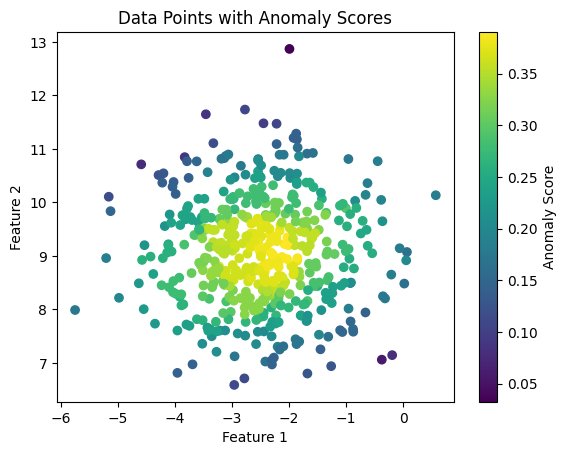

In [42]:
# color map pt datele noastre
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Data Points with Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


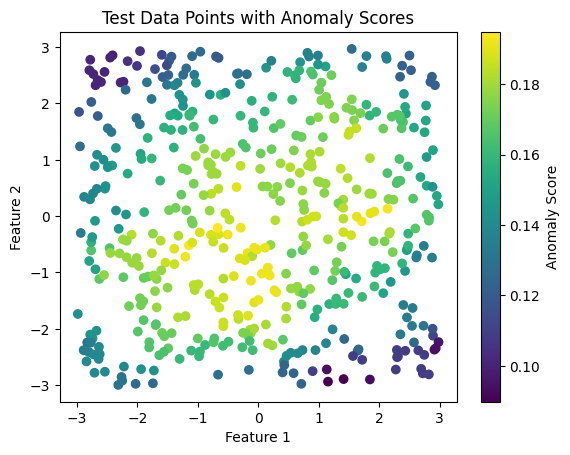

In [43]:
test_data = np.random.uniform(-3, 3, size=(500, 2))
test_anomaly_scores = compute_anomaly_scores(test_data, vector)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

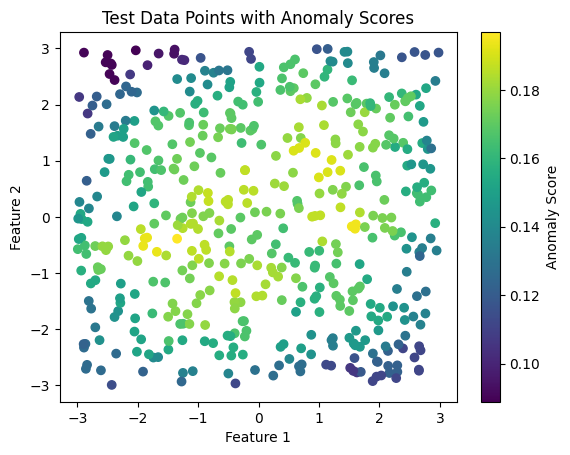

In [45]:
test_data = np.random.uniform(-3, 3, size=(500, 2))
test_anomaly_scores = compute_anomaly_scores(test_data, vector, num_bins=10)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Ex 2

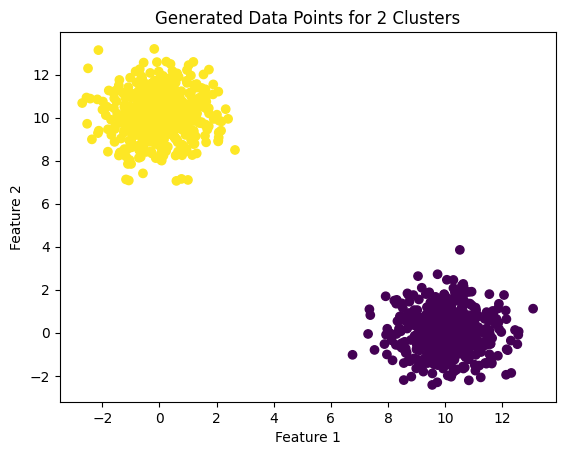

In [28]:
'''
generate 2 clusters of 2-dimensional data using make blobs()
function. The 2 clusters will have (10, 0) and (0, 10) as centers, 1 as
standard deviation and 500 samples each.
'''

data2 = datasets.make_blobs(n_samples=1000, centers=[[10, 0], [0, 10]], cluster_std=1.0, random_state=42)
X2, y2 = data2
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis')
plt.title("Generated Data Points for 2 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


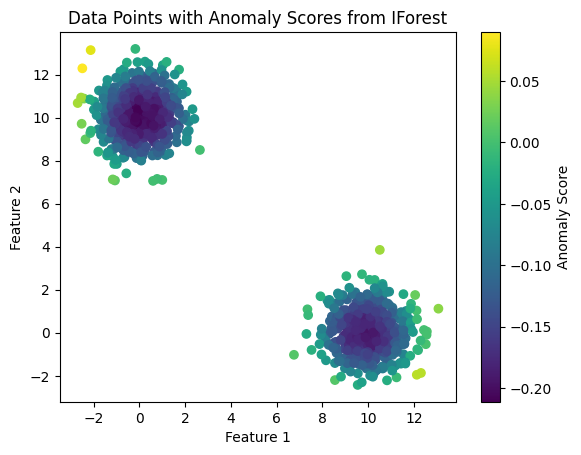

In [30]:
# fit IForest model from pyod
from pyod.models.iforest import IForest
model = IForest(contamination=0.02)
model.fit(X2)
# get the anomaly scores
anomaly_scores2 = model.decision_function(X2)
# plot the data points with anomaly scores
plt.scatter(X2[:, 0], X2[:, 1], c=anomaly_scores2, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Data Points with Anomaly Scores from IForest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

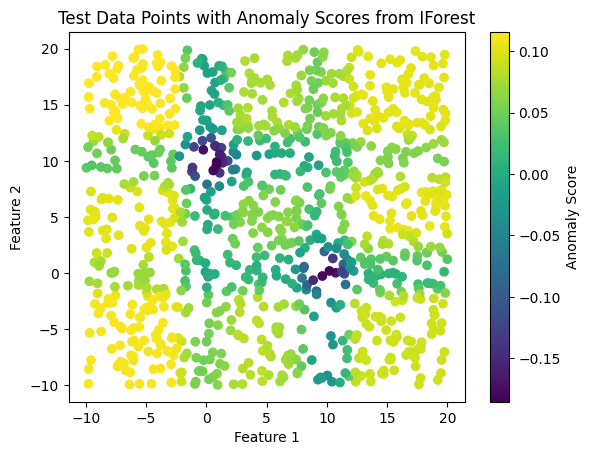

In [31]:
test_data = np.random.uniform(-10, 20, size=(1000, 2))
test_anomaly_scores2 = model.decision_function(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores2, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores from IForest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

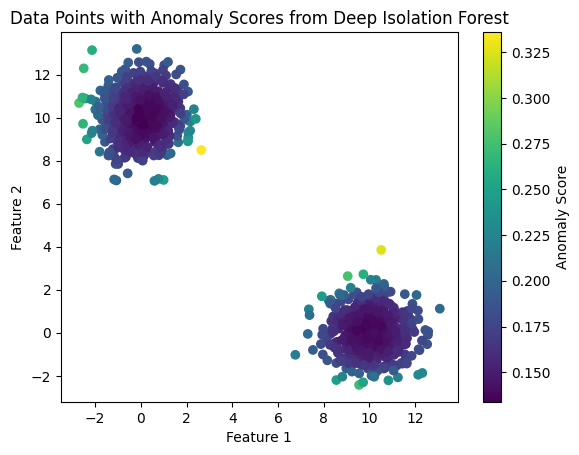

In [33]:
# same but with Deep Isolation Forest
from pyod.models.dif import DIF
model_dif = DIF(contamination=0.02)
model_dif.fit(X2)
# get the anomaly scores
anomaly_scores_dif = model_dif.decision_function(X2)
# plot the data points with anomaly scores
plt.scatter(X2[:, 0], X2[:, 1], c=anomaly_scores_dif, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Data Points with Anomaly Scores from Deep Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

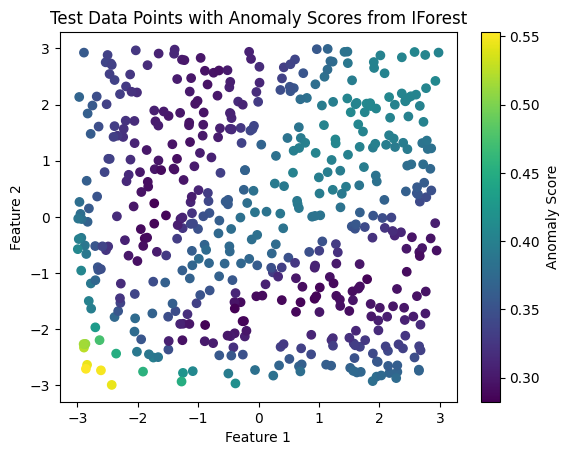

In [46]:
test_anomaly_scores3 = model_dif.decision_function(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores3, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores from IForest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

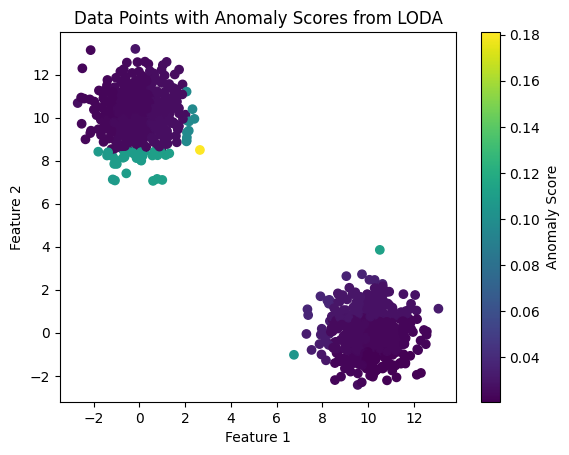

In [34]:
# Loda
from pyod.models.loda import LODA
model_loda = LODA(contamination=0.02)
model_loda.fit(X2)
# get the anomaly scores
anomaly_scores_loda = model_loda.decision_function(X2)
# plot the data points with anomaly scores
plt.scatter(X2[:, 0], X2[:, 1], c=anomaly_scores_loda, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Data Points with Anomaly Scores from LODA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

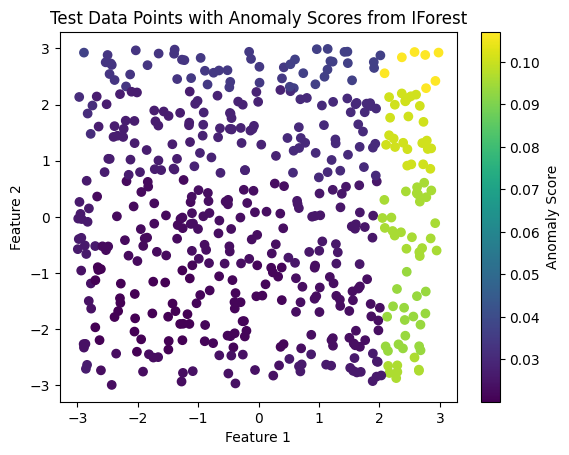

In [47]:
test_anomaly_scores3 = model_loda.decision_function(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores3, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores from IForest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

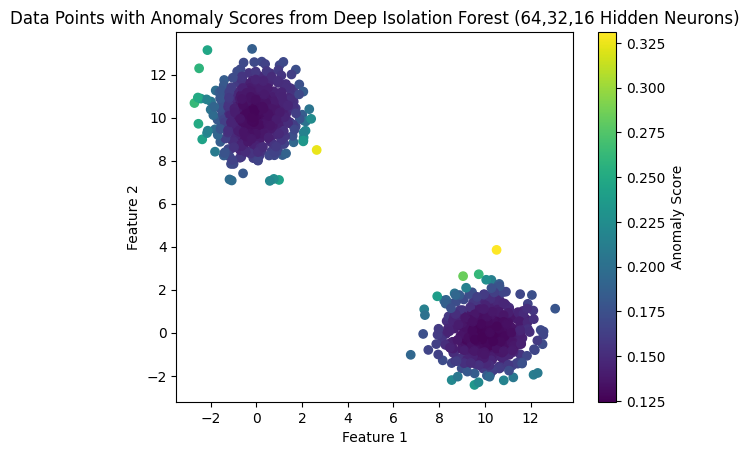

In [35]:
'''
Try different number of neurons for the hidden layers used by DIF and
different number of bins for LODA. Try to explain why the score maps
for LODA look that way.
'''

model_dif_2 = DIF(hidden_neurons=[64, 32, 16], contamination=0.02)
model_dif_2.fit(X2)
# get the anomaly scores
anomaly_scores_dif_2 = model_dif_2.decision_function(X2)
# plot the data points with anomaly scores
plt.scatter(X2[:, 0], X2[:, 1], c=anomaly_scores_dif_2, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Data Points with Anomaly Scores from Deep Isolation Forest (64,32,16 Hidden Neurons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

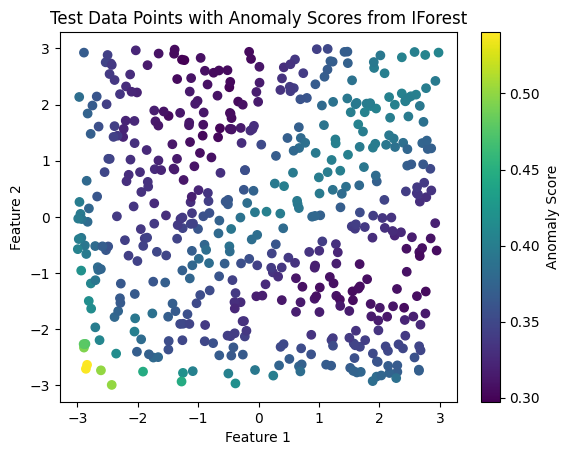

In [48]:
test_anomaly_scores4 = model_dif_2.decision_function(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores4, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores from IForest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

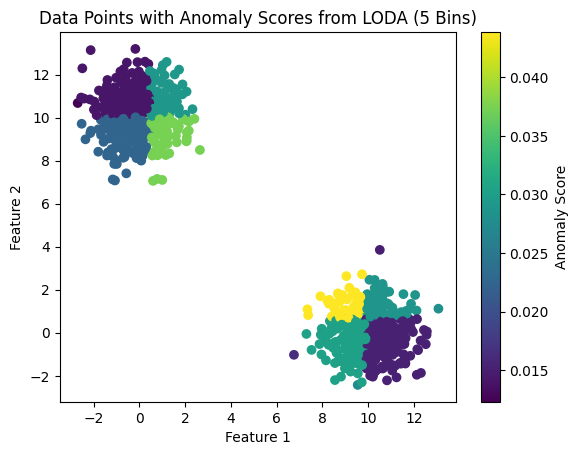

In [36]:
# Loda with different number of bins
model_loda_2 = LODA(n_bins=5, contamination=0.02)
model_loda_2.fit(X2)
# get the anomaly scores
anomaly_scores_loda_2 = model_loda_2.decision_function(X2)
# plot the data points with anomaly scores
plt.scatter(X2[:, 0], X2[:, 1], c=anomaly_scores_loda_2, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Data Points with Anomaly Scores from LODA (5 Bins)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


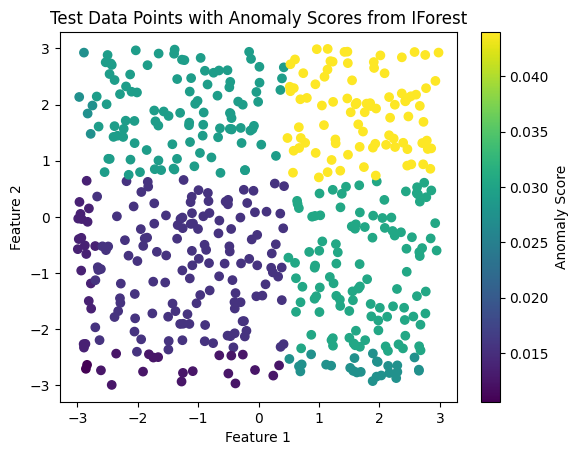

In [49]:
test_anomaly_scores5 = model_loda_2.decision_function(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_anomaly_scores5, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title("Test Data Points with Anomaly Scores from IForest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The loda model also takes random directions, but only sqrt(d) parameters are not null. (it is implemented this way). So, in our 2D case, only 1 parameter is not null, so the model is similar to projecting the data on a single axis and computing the histogram on that axis. This is why the score maps look like vertical or horizontal bands.

### 3D redo

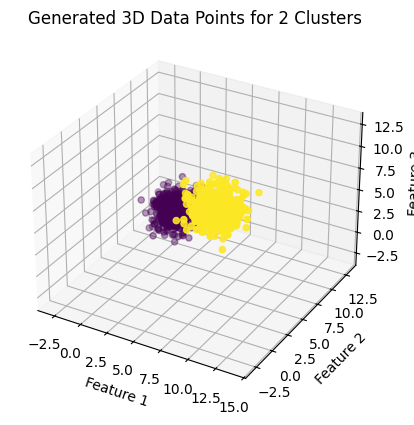

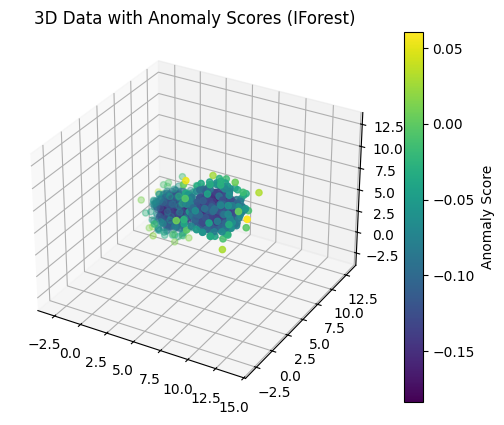

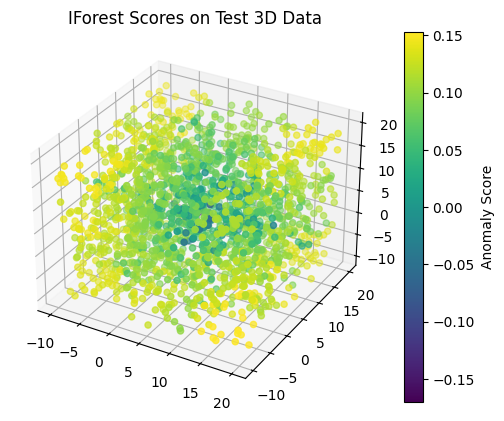

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

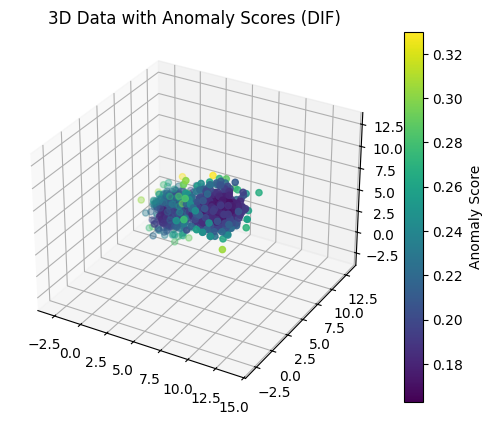

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

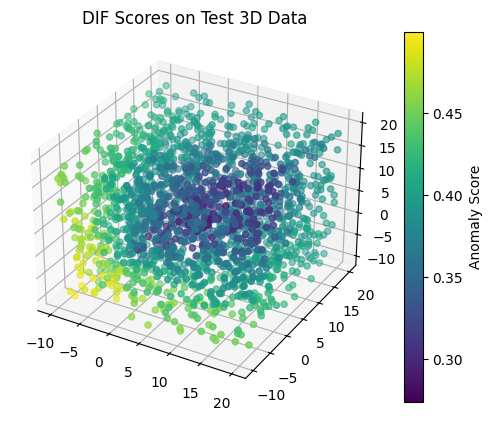

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

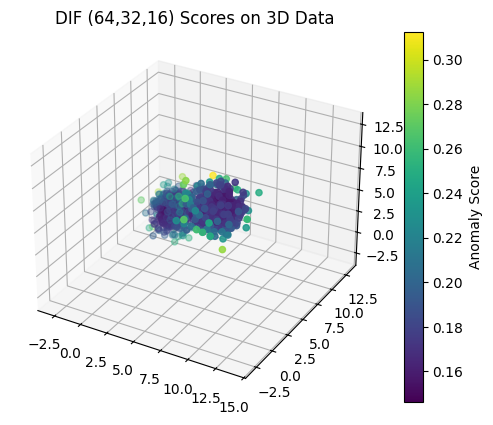

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

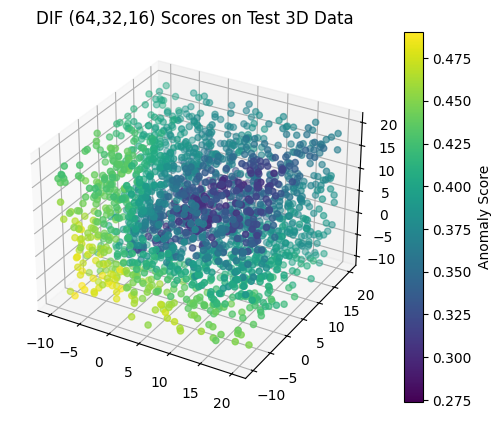

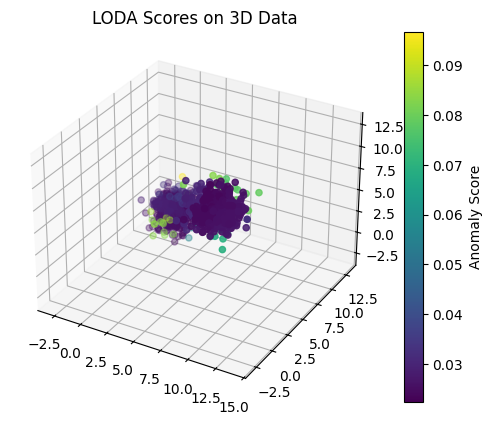

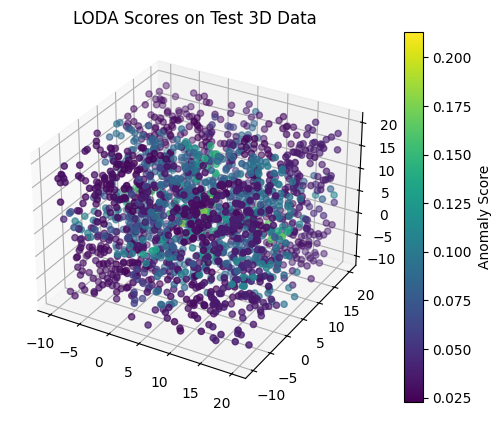

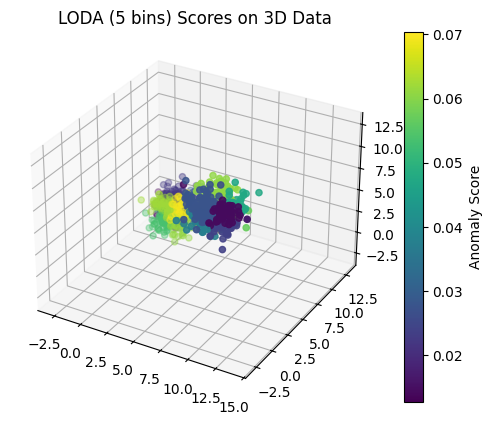

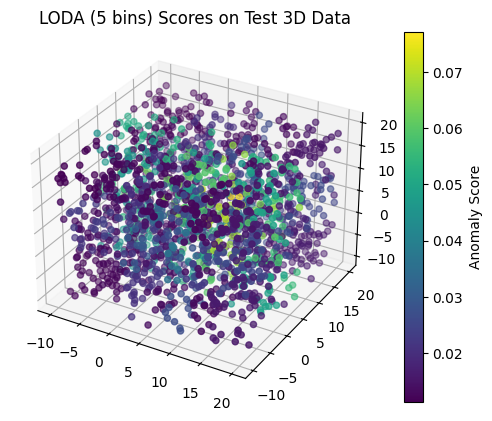

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA

# ------------------------
# Generate 3D blobs
# ------------------------
data3 = datasets.make_blobs(
    n_samples=1000,
    centers=[[0, 10, 0], [10, 0, 10]],
    cluster_std=1.0,
    random_state=42
)
X3, y3 = data3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=y3, cmap='viridis')
ax.set_title("Generated 3D Data Points for 2 Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

# ------------------------
# Isolation Forest
# ------------------------
model = IForest(contamination=0.02)
model.fit(X3)
anomaly_scores3 = model.decision_function(X3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=anomaly_scores3, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("3D Data with Anomaly Scores (IForest)")
plt.show()

# Test grid
test_data = np.random.uniform(-10, 20, size=(2000, 3))
test_scores = model.decision_function(test_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_scores, cmap='viridis')
fig.colorbar(p, label="Anomaly Score")
ax.set_title("IForest Scores on Test 3D Data")
plt.show()

# ------------------------
# Deep Isolation Forest
# ------------------------
model_dif = DIF(contamination=0.02)
model_dif.fit(X3)
scores_dif = model_dif.decision_function(X3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=scores_dif, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("3D Data with Anomaly Scores (DIF)")
plt.show()

# Test grid
test_scores_dif = model_dif.decision_function(test_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_scores_dif, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("DIF Scores on Test 3D Data")
plt.show()

# Deeper DIF
model_dif_2 = DIF(hidden_neurons=[64, 32, 16], contamination=0.02)
model_dif_2.fit(X3)
scores_dif_2 = model_dif_2.decision_function(X3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=scores_dif_2, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("DIF (64,32,16) Scores on 3D Data")
plt.show()

# Test grid
test_scores_dif2 = model_dif_2.decision_function(test_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_scores_dif2, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("DIF (64,32,16) Scores on Test 3D Data")
plt.show()

# ------------------------
# LODA
# ------------------------
model_loda = LODA(contamination=0.02)
model_loda.fit(X3)
scores_loda = model_loda.decision_function(X3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=scores_loda, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("LODA Scores on 3D Data")
plt.show()

# Test grid
test_scores_loda = model_loda.decision_function(test_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_scores_loda, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("LODA Scores on Test 3D Data")
plt.show()

# LODA with 5 bins
model_loda_2 = LODA(n_bins=5, contamination=0.02)
model_loda_2.fit(X3)
scores_loda2 = model_loda_2.decision_function(X3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=scores_loda2, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("LODA (5 bins) Scores on 3D Data")
plt.show()

# Test grid
test_scores_loda2 = model_loda_2.decision_function(test_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_scores_loda2, cmap='viridis')
fig.colorbar(p, label='Anomaly Score')
ax.set_title("LODA (5 bins) Scores on Test 3D Data")
plt.show()

# Ex 3

In [1]:
import scipy
data = scipy.io.loadmat("shuttle.mat")

In [2]:
X, y = data["X"], data['y']
print(X.shape)
print(y.shape)

(49097, 9)
(49097, 1)


In [3]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape)

(29458, 9) (19639, 9)


In [4]:
# normalize deta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# fit IForest, LODA, and DIF
from pyod.models.iforest import IForest
from pyod.models.loda import LODA
from pyod.models.dif import DIF

In [6]:
# fit IForest
clf_iforest = IForest()
clf_iforest.fit(X_train)
# predict
y_pred_iforest = clf_iforest.predict(X_test)

# fit LODA
clf_loda = LODA()
clf_loda.fit(X_train)
# predict
y_pred_loda = clf_loda.predict(X_test)

# fit DIF
clf_dif = DIF()
clf_dif.fit(X_train)
# predict
y_pred_dif = clf_dif.predict(X_test)

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

In [7]:
# function to print metrics, BA, ROC, AUC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
def print_metrics(y_true, y_pred, y_scores, model_name):
    ba = balanced_accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    # plot ROC curve
    from sklearn.metrics import RocCurveDisplay
    RocCurveDisplay.from_predictions(y_true, y_scores)

    print(f"{model_name} - Balanced Accuracy: {ba:.4f}, AUC: {auc:.4f}")

C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\david\PyCharmMiscProject\.venv\

IForest - Balanced Accuracy: 0.9759, AUC: 0.9981
LODA - Balanced Accuracy: 0.7494, AUC: 0.8808
DIF - Balanced Accuracy: 0.5158, AUC: 0.9717


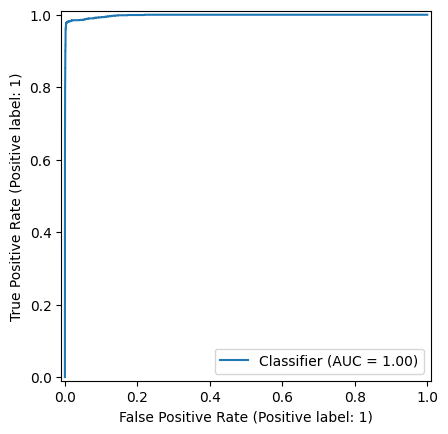

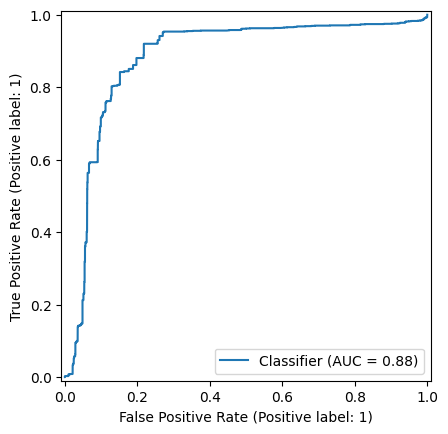

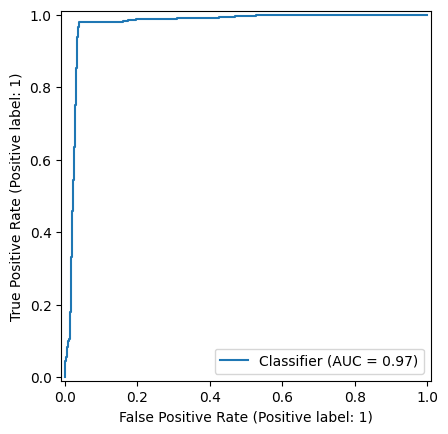

In [8]:
# python
y_scores_iforest = clf_iforest.decision_function(X_test)
y_scores_loda = clf_loda.decision_function(X_test)
y_scores_dif = clf_dif.decision_function(X_test)

print_metrics(y_test, y_pred_iforest, y_scores_iforest, "IForest")
print_metrics(y_test, y_pred_loda, y_scores_loda, "LODA")
print_metrics(y_test, y_pred_dif, y_scores_dif, "DIF")
